In [5]:
"""
Calculate the expected values of the cut-off frequencies for the high- and low-pass filters using the measured component values.

High pass: C = 991 pF, R= 10.07 kΩ
Low pass: R = 9.96 kΩ, C = 1 nF
"""

R_hp = 10.07e3  # Ohms
C_hp = 991e-12  # Farads
f_c_hp = 1 / (2 * np.pi * R_hp * C_hp)
print(f"High-pass filter cut-off frequency: {f_c_hp:.2f} Hz")

R_lp = 9.96e3  # Ohms
C_lp = 1e-9    # Farads
f_c_lp = 1 / (2 * np.pi * R_lp * C_lp)
print(f"Low-pass filter cut-off frequency: {f_c_lp:.2f} Hz")


"""
Calculate expected center frequency for the band-pass filter using measured component values.
R = 10.03 kΩ, L = 9.97 mH, C = 10.06 nF
"""

R_bp = 10.03e3   # Ohms
L_bp = 9.97e-3   # Henrys
C_bp = 10.06e-9  # Farads
f_0_bp = 1 / (2 * np.pi * (np.sqrt(L_bp * C_bp)))
print(f"Band-pass filter center frequency: {f_0_bp:.2f} Hz")

print(f"Band-pass filter Q factor: {np.sqrt(L_bp)/(R_bp * np.sqrt( C_bp)):.2f}")

High-pass filter cut-off frequency: 15948.40 Hz
Low-pass filter cut-off frequency: 15979.41 Hz
Band-pass filter center frequency: 15891.82 Hz
Band-pass filter Q factor: 0.10


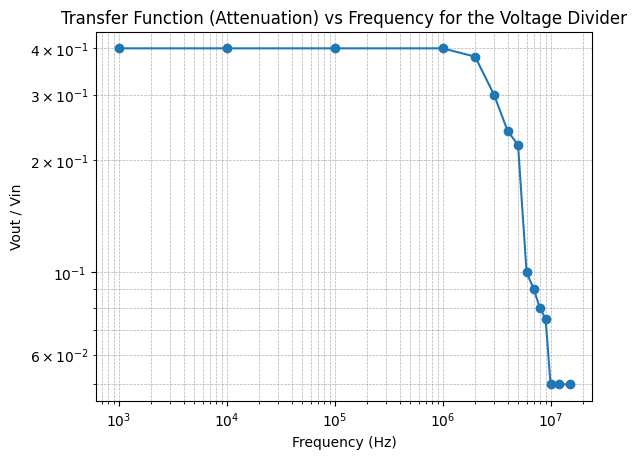

In [28]:
import numpy as np

import matplotlib.pyplot as plt

# frequencies in Hz and corresponding Vout/Vin
freqs = np.array([1e3, 1e4, 1e5, 1e6, 2e6, 3e6, 4e6, 5e6, 6e6, 7e6, 8e6, 9e6, 10e6, 12e6, 15e6], dtype=float)
vals = np.array([0.4, 0.4, 0.4, 0.4, 0.38, 0.3, 0.24, 0.22, 0.1, 0.09, 0.08, 0.075, 0.05, 0.05, 0.05], dtype=float)

data_fortran = np.asfortranarray(np.column_stack((freqs, vals)))

# log-log plot with line connecting points
plt.figure()
plt.loglog(freqs, vals, marker='o', linestyle='-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vout / Vin')
plt.title('Transfer Function (Attenuation) vs Frequency for the Voltage Divider')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

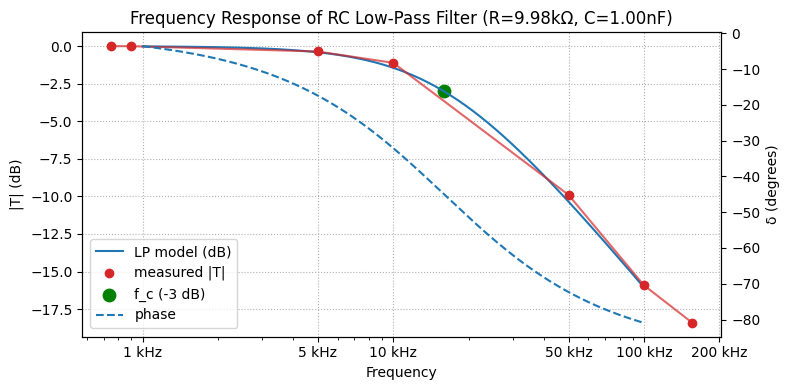

In [29]:
import math
import numpy as np

import matplotlib.pyplot as plt

def lowpass_gain(R, C, f):
    omega = 2 * math.pi * f
    return 1.0 / math.sqrt(1 + (omega * R * C) ** 2)

def lowpass_delta_angle(R, C, f):
    omega = 2 * math.pi * f
    return math.degrees(-math.atan(omega * R * C))

# component values
R = 9.98e3
C = 1e-9

# model frequencies and response
frequencies = np.logspace(3, 5, 200)
gain_lp = np.array([lowpass_gain(R, C, f) for f in frequencies])
phase_lp = np.array([lowpass_delta_angle(R, C, f) for f in frequencies])
gain_db = 20 * np.log10(np.clip(gain_lp, 1e-30, None))
f_c = 1 / (2 * math.pi * R * C)

# measured low-pass data to overlay
meas_freqs = np.array([750.0, 900.0, 5e3, 10e3, 50e3, 100e3, 156e3])
meas_mag = np.array([1.0, 1.0, 0.96, 0.88, 0.32, 0.16, 0.12])
meas_db = 20.0 * np.log10(np.clip(meas_mag, 1e-30, None))

# plot
fig, ax1 = plt.subplots(figsize=(8, 4))
ax1.set_title(f"Frequency Response of RC Low-Pass Filter (R={R/1e3:.2f}kΩ, C={C*1e9:.2f}nF)")
ax1.set_xlabel('Frequency')
ax1.set_ylabel('|T| (dB)')
ax1.set_xscale('log')
ax1.plot(frequencies, gain_db, color='tab:blue', label='LP model (dB)')
ax1.scatter(meas_freqs, meas_db, color='tab:red', zorder=30, label='measured |T|')
ax1.plot(meas_freqs, meas_db, color='tab:red', linestyle='-', alpha=0.7)
ax1.scatter([f_c], [20 * math.log10(1 / math.sqrt(2))], color='g', s=80, label='f_c (-3 dB)')
ax1.grid(axis='both', linestyle='dotted')

ax2 = ax1.twinx()
ax2.set_ylabel('δ (degrees)')
ax2.plot(frequencies, phase_lp, color='tab:blue', linestyle='dashed', label='phase')

# human-friendly x ticks (kHz / MHz)
xticks = np.array([1e3, 5e3, 1e4, 5e4, 1e5, 2e5])
ax1.set_xticks(xticks)
def fmt_tick(v):
    if v >= 1e6:
        return f"{v/1e6:g} MHz"
    return f"{int(v/1e3)} kHz"
ax1.set_xticklabels([fmt_tick(v) for v in xticks])

fig.legend(loc="lower left", bbox_to_anchor=(0.11, 0.15))
fig.tight_layout()
plt.show()

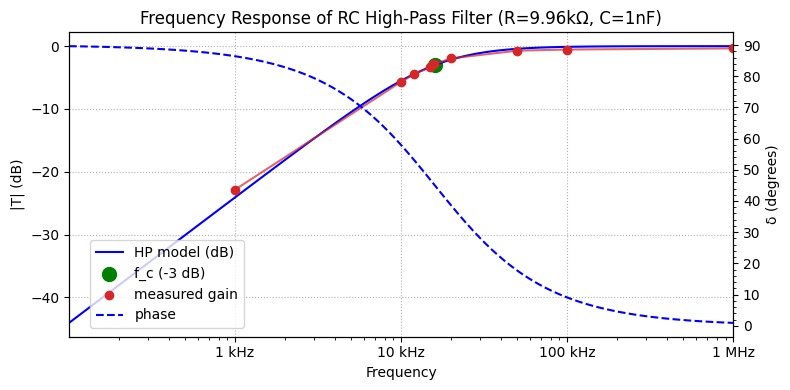

In [30]:
# self-contained: recreate high-pass Bode and overlay measured |T|
R = 9.96e3
C = 1e-9

frequencies = np.logspace(2, 6, 100)
f_c = 1 / (2 * np.pi * R * C)

def highpass_gain(R, C, f):
    omega = 2 * np.pi * f
    x = omega * R * C
    return x / np.sqrt(1 + x**2)

def highpass_delta_angle(R, C, f):
    omega = 2 * np.pi * f
    x = omega * R * C
    return 90.0 - np.degrees(np.arctan(x))

gain_hp = np.array([highpass_gain(R, C, f) for f in frequencies])
gain_hp_db = 20 * np.log10(np.clip(gain_hp, 1e-30, None))
phase_hp = np.array([highpass_delta_angle(R, C, f) for f in frequencies])

fig, ax1 = plt.subplots(1, 1, figsize=(8, 4))
ax1.set_title("Frequency Response of RC High-Pass Filter (R=9.96kΩ, C=1nF)")
ax1.set_xlabel('Frequency')
ax1.set_ylabel('|T| (dB)')
ax1.set_xscale('log')
ax1.set_xlim(1e2, 1e6)
ax1.plot(frequencies, gain_hp_db, color='b', label='HP model (dB)')
ax1.grid(axis='both', linestyle='dotted')

ax2 = ax1.twinx()
ax2.set_ylabel('δ (degrees)')
ax2.plot(frequencies, phase_hp, color='b', linestyle='dashed', label='phase')
ax2.set_yticks(np.arange(0, 91, 10))
ax2.set_yticks(np.arange(0, 91, 2), minor=True)

ax1.scatter(f_c, 20 * np.log10(1 / np.sqrt(2)), color='g', s=100, label='f_c (-3 dB)')

# measured data (frequency vs |T|)
meas_freqs = np.array([1e3, 1e4, 12e3, 15e3, 15.5e3, 15.9e3, 20e3, 50e3, 100e3, 1e6])
meas_mag = np.array([0.072, 0.52, 0.6, 0.68, 0.72, 0.72, 0.8, 0.92, 0.94, 0.96])
meas_db = 20.0 * np.log10(np.clip(meas_mag, 1e-30, None))

ax1.scatter(meas_freqs, meas_db, color='tab:red', zorder=20, label='measured gain')
ax1.plot(meas_freqs, meas_db, color='tab:red', linestyle='-', alpha=0.7)

# x-axis ticks labeled in kHz / MHz
xticks = np.array([1e3, 1e4, 1e5, 1e6])
ax1.set_xticks(xticks)
ax1.set_xticklabels([f"{v/1e6:g} MHz" if v >= 1e6 else f"{v/1e3:g} kHz" for v in xticks])

fig.legend(loc="lower left", bbox_to_anchor=(0.11, 0.15))
fig.tight_layout()
plt.show()

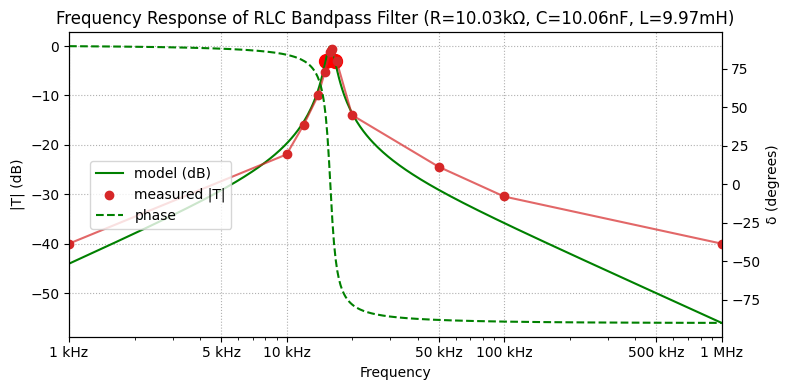

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# bandpass transfer for series R-L-C, output across R
def bandpass_gain(R, L, C, f):
    import math
    omega = 2 * math.pi * f
    numerator = omega * L
    denominator = math.sqrt( (R - omega**2 * L * R * C)**2 + (omega * L)**2 )
    return numerator / denominator

def bandpass_delta_angle(R, L, C, f):
    import math
    omega = 2 * math.pi * f
    #delta_radians = math.atan((omega * L) / (R**2 - omega**2 * L * R * C))
    delta_radians = math.atan( (R - omega**2 * L * R * C) / (omega * L))
    delta_degrees = math.degrees(delta_radians)
    return delta_degrees

# component values and model
r = 10.03e3
c = 10.06e-9
l = 9.97e-3

frequencies = np.logspace(3, 6, 400)  # 1 kHz .. 1 MHz
mags = np.array([bandpass_gain(r, l, c, f) for f in frequencies])
phases = np.array([bandpass_delta_angle(r, l, c, f) for f in frequencies])
mags_db = 20.0 * np.log10(np.clip(mags, 1e-30, None))

# find 3 dB crossings
threshold = 1.0 / np.sqrt(2.0)
mask = mags >= threshold
cross_indices = np.where(np.diff(mask.astype(int)) != 0)[0]
f_crosses = []
for i in cross_indices:
    f1, f2 = frequencies[i], frequencies[i+1]
    m1, m2 = mags[i], mags[i+1]
    if m2 != m1:
        f_cross = f1 + (threshold - m1) * (f2 - f1) / (m2 - m1)
        f_crosses.append(f_cross)

# measured data (frequency Hz, |T|)
meas_freqs = np.array([1e3, 10e3, 12e3, 14e3, 15e3, 15.86e3, 16e3, 16.15e3, 17e3, 20e3, 50e3, 100e3, 1e6])
meas_mag = np.array([0.01, 0.08, 0.16, 0.32, 0.55, 0.88, 0.90, 0.94, 0.70, 0.20, 0.06, 0.03, 0.01])
meas_db = 20.0 * np.log10(np.clip(meas_mag, 1e-30, None))

fig, ax1 = plt.subplots(figsize=(8, 4))
ax1.set_title(f"Frequency Response of RLC Bandpass Filter (R={r/1e3:.2f}kΩ, C={c*1e9:.2f}nF, L={l*1e3:.2f}mH)")
ax1.set_xlabel('Frequency')
ax1.set_ylabel('|T| (dB)')
ax1.plot(frequencies, mags_db, color='g', label='model (dB)')
ax1.scatter(meas_freqs, meas_db, color='tab:red', zorder=20, label='measured |T|')
ax1.plot(meas_freqs, meas_db, color='tab:red', linestyle='-', alpha=0.7)
ax1.set_xscale('log')
ax1.set_xlim(1e3, 1e6)
ax1.grid(axis='both', linestyle='dotted')

ax2 = ax1.twinx()
ax2.set_ylabel('δ (degrees)')
ax2.plot(frequencies, phases, color='g', linestyle='dashed', label='phase')

if f_crosses:
    ax1.scatter(f_crosses, [20.0 * np.log10(threshold)] * len(f_crosses), color='r', s=100)

# kHz / MHz ticks
ticks = np.array([1e3, 5e3, 1e4, 5e4, 1e5, 5e5, 1e6])
ax1.set_xticks(ticks)
def _fmt(v):
    return f"{v/1e6:g} MHz" if v >= 1e6 else f"{int(v/1e3)} kHz"
ax1.set_xticklabels([_fmt(t) for t in ticks])

fig.legend(loc="center left", bbox_to_anchor=(0.11, 0.5))
fig.tight_layout()
plt.show()